In [1]:
import zipfile
import os
import shutil

In [2]:
# === Upload your dataset ===
from google.colab import files
uploaded = files.upload()

Saving yolo dataset.zip to yolo dataset.zip


In [3]:
import zipfile

# Unzip into a working directory
zip_path = "yolo dataset.zip"
extract_path = "/content/GPR_stimulated-YOLO-Dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipped to:", extract_path)


✅ Unzipped to: /content/GPR_stimulated-YOLO-Dataset


In [4]:
import os

base_path = "/content/GPR_stimulated-YOLO-Dataset"

In [5]:
!ls -R /content/GPR_stimulated-YOLO-Dataset/yolo\ dataset/

'/content/GPR_stimulated-YOLO-Dataset/yolo dataset/':
images	labels

'/content/GPR_stimulated-YOLO-Dataset/yolo dataset/images':
test  train

'/content/GPR_stimulated-YOLO-Dataset/yolo dataset/images/test':
 gpr_clay_r0_05_d0_1_a30__merged_rx1_Ez_ingaussiannoise.png
 gpr_clay_r0_05_d0_1_a45__merged_rx1_Ez_inhorizontalstretch.png
 gpr_clay_r0_05_d0_1_a60__merged_rx1_Ez_inflip.png
 gpr_clay_r0_05_d0_1_a75__merged_rx1_Ez_inverticalstretch.png
 gpr_clay_r0_05_d0_2_a15__merged_rx1_Ez_ingaussiannoise.png
 gpr_clay_r0_05_d0_2_a15__merged_rx1_Ez_inrotation.png
 gpr_clay_r0_05_d0_2_a30__merged_rx1_Ez_inflip.png
 gpr_clay_r0_05_d0_2_a45__merged_rx1_Ez_inflip.png
 gpr_clay_r0_05_d0_2_a45__merged_rx1_Ez_ingaussiannoise.png
 gpr_clay_r0_05_d0_2_a45__merged_rx1_Ez_inrotation.png
 gpr_clay_r0_05_d0_2_a45__merged_rx1_Ez_inspecklenoise.png
 gpr_clay_r0_05_d0_2_a45__merged_rx1_Ez_inverticalstretch.png
 gpr_clay_r0_05_d0_2_a45__merged_rx1_Ez.png
 gpr_clay_r0_05_d0_2_a60__merged_rx1_Ez_inclahe.png
 gpr_cl

In [6]:
yaml_path = "/content/GPR_stimulated-YOLO-Dataset/yolo dataset/gpr_data.yaml"

with open(yaml_path, 'w') as f:
    f.write(f"""
path: /content/GPR_stimulated-YOLO-Dataset/yolo dataset
train: images/train
val: images/test

nc: 1
names: ['hyperbola']
""")

print("✅ YOLOv5 YAML config created at:", yaml_path)

✅ YOLOv5 YAML config created at: /content/GPR_stimulated-YOLO-Dataset/yolo dataset/gpr_data.yaml


In [7]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17494 (from 4)
Receiving objects: 100% (17511/17511), 16.65 MiB | 23.72 MiB/s, done.
Resolving deltas: 100% (11996/11996), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 851.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2

In [8]:
!python train.py \
  --img 256 \
  --batch 8 \
  --epochs 50 \
  --data "/content/GPR_stimulated-YOLO-Dataset/yolo dataset/gpr_data.yaml" \
  --weights yolov5s.pt \
  --project runs/train_gpr \
  --name yolov5s_gpr \
  --save-period 10 \
  --exist-ok

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      38/49         0G    0.02418   0.009898          0         14        256:  64% 139/217 [04:39<02:37,  2.03s/it]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      38/49         0G    0.02415   0.009872          0         11        256:  65% 140/217 [04:41<02:35,  2.02s/it]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      38/49         0G    0.02414    0.00987          0         15        256:  65% 141/217 [04:43<02:31,  1.99s/it]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

In [9]:
!ls runs/train_gpr/yolov5s_gpr/weights/

best.pt  epoch0.pt  epoch10.pt	epoch20.pt  epoch30.pt	epoch40.pt  last.pt


In [10]:
!python detect.py \
  --weights runs/train_gpr/yolov5s_gpr/weights/best.pt \
  --img 256 \
  --conf 0.3 \
  --source "/content/GPR_stimulated-YOLO-Dataset/yolo dataset/images/test" \
  --name yolov5_infer \
  --save-txt \
  --exist-ok

detect: weights=['runs/train_gpr/yolov5s_gpr/weights/best.pt'], source=/content/GPR_stimulated-YOLO-Dataset/yolo dataset/images/test, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov5_infer, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/434 /content/GPR_stimulated-YOLO-Dataset/yolo dataset/images/test/gpr_clay_r0_05_d0_1_a30__merged_rx1_Ez_ingaussiannoise.png: 256x256 1 hyperbola, 82.7ms
image 2/434 /content/GPR_stimulated-YOLO-Dataset/yolo dataset/images/test/gpr_clay_r0_05_d0_1_a45__merged_rx1_Ez_inh

In [11]:
!ls -R runs/train_gpr

runs/train_gpr:
yolov5s_gpr

runs/train_gpr/yolov5s_gpr:
confusion_matrix.png				     results.png
events.out.tfevents.1752212798.ab9f7677843e.38214.0  train_batch0.jpg
F1_curve.png					     train_batch1.jpg
hyp.yaml					     train_batch2.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
opt.yaml					     val_batch1_labels.jpg
P_curve.png					     val_batch1_pred.jpg
PR_curve.png					     val_batch2_labels.jpg
R_curve.png					     val_batch2_pred.jpg
results.csv					     weights

runs/train_gpr/yolov5s_gpr/weights:
best.pt  epoch0.pt  epoch10.pt	epoch20.pt  epoch30.pt	epoch40.pt  last.pt


In [12]:
import glob
from IPython.display import Image, display

# Path to output folder
result_images = glob.glob('runs/detect/yolov5_infer/*.jpg')

# Display first 5 results (you can change the number)
for img_path in result_images[:5]:
    display(Image(filename=img_path))

In [13]:
!zip -r yolov5_infer_results.zip runs/detect/yolov5_infer/
from google.colab import files
files.download('yolov5_infer_results.zip')

  adding: runs/detect/yolov5_infer/ (stored 0%)
  adding: runs/detect/yolov5_infer/gpr_dry_soil_r0_05_d0_3_a75__merged_rx1_Ez_inverticalstretch.png (deflated 22%)
  adding: runs/detect/yolov5_infer/gpr_loamy_soil_r0_05_d0_1_a60__merged_rx1_Ez_ingaussianblur.png (deflated 23%)
  adding: runs/detect/yolov5_infer/gpr_silty_soil_r0_05_d0_4_a15__merged_rx1_Ez_ingaussianblur.png (deflated 25%)
  adding: runs/detect/yolov5_infer/gpr_moist_soil_r0_05_d0_5_a30__merged_rx1_Ez_ingaussianblur.png (deflated 25%)
  adding: runs/detect/yolov5_infer/gpr_loamy_soil_r0_05_d0_3_a15__merged_rx1_Ez_inverticalstretch.png (deflated 28%)
  adding: runs/detect/yolov5_infer/gpr_wet_concrete_r0_05_d0_2_a60__merged_rx1_Ez_inrotation.png (deflated 23%)
  adding: runs/detect/yolov5_infer/gpr_pec_r0_05_d0_3_a60__merged_rx1_Ez - Copy_inverticalstretch.png (deflated 19%)
  adding: runs/detect/yolov5_infer/gpr_pec_r0_05_d0_3_a45__merged_rx1_Ez - Copy_ingaussiannoise.png (deflated 11%)
  adding: runs/detect/yolov5_infer

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

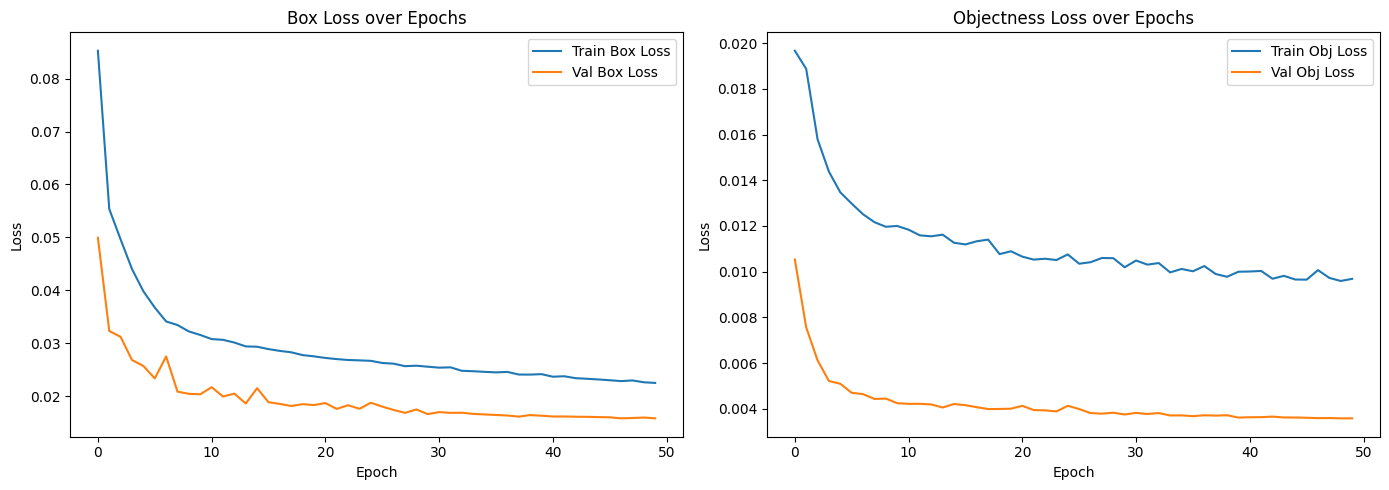

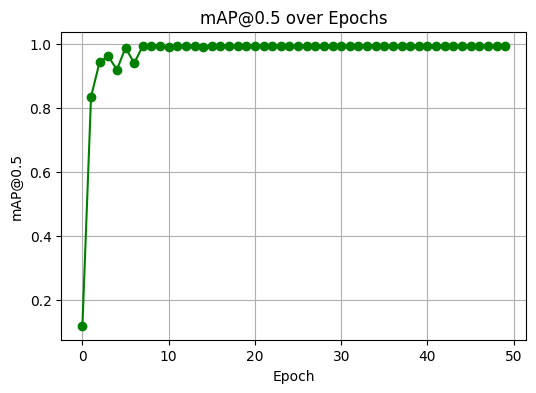

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
results_path = 'runs/train_gpr/yolov5s_gpr/results.csv'
df = pd.read_csv(results_path)

# Fix the column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Plot Box Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.title('Box Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Objectness Loss
plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['train/obj_loss'], label='Train Obj Loss')
plt.plot(df['epoch'], df['val/obj_loss'], label='Val Obj Loss')
plt.title('Objectness Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot mAP
plt.figure(figsize=(6, 4))
plt.plot(df['epoch'], df['metrics/mAP_0.5'], marker='o', color='green')
plt.title('mAP@0.5 over Epochs')
plt.xlabel('Epoch')
plt.ylabel('mAP@0.5')
plt.grid(True)
plt.show()

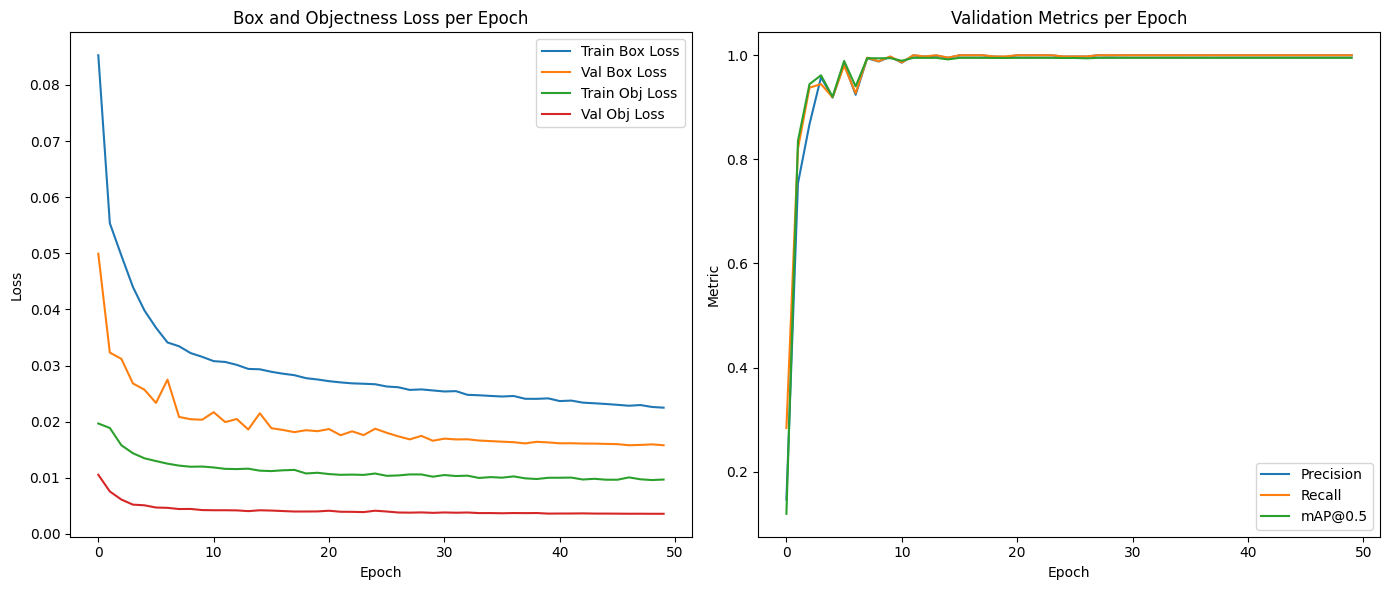

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load and clean CSV
results_path = 'runs/train_gpr/yolov5s_gpr/results.csv'
df = pd.read_csv(results_path)
df.columns = [col.strip() for col in df.columns]

# Plot Training vs Validation Losses
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['train/obj_loss'], label='Train Obj Loss')
plt.plot(df['epoch'], df['val/obj_loss'], label='Val Obj Loss')
plt.title('Box and Objectness Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Metrics: Precision, Recall, mAP
plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['metrics/precision'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP_0.5'], label='mAP@0.5')
plt.title('Validation Metrics per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
last_epoch = df.iloc[-1]
print("📊 Final Epoch Stats:")
print(f"Precision: {last_epoch['metrics/precision']:.3f}")
print(f"Recall: {last_epoch['metrics/recall']:.3f}")
print(f"mAP@0.5: {last_epoch['metrics/mAP_0.5']:.3f}")
print(f"mAP@0.5:0.95: {last_epoch['metrics/mAP_0.5:0.95']:.3f}")

📊 Final Epoch Stats:
Precision: 1.000
Recall: 1.000
mAP@0.5: 0.995
mAP@0.5:0.95: 0.704


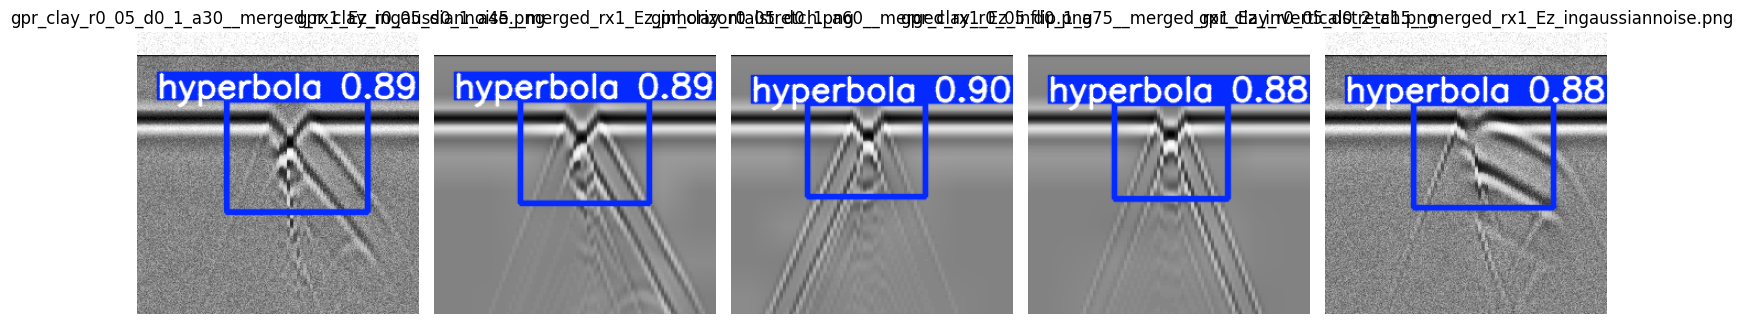

In [17]:
import os
import matplotlib.pyplot as plt
import cv2

# Path to results
result_path = 'runs/detect/yolov5_infer'
images = sorted(os.listdir(result_path))

# Show first 5 images
plt.figure(figsize=(15, 10))
for i, img_file in enumerate(images[:5]):
    img_path = os.path.join(result_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
plt.tight_layout()
plt.show()


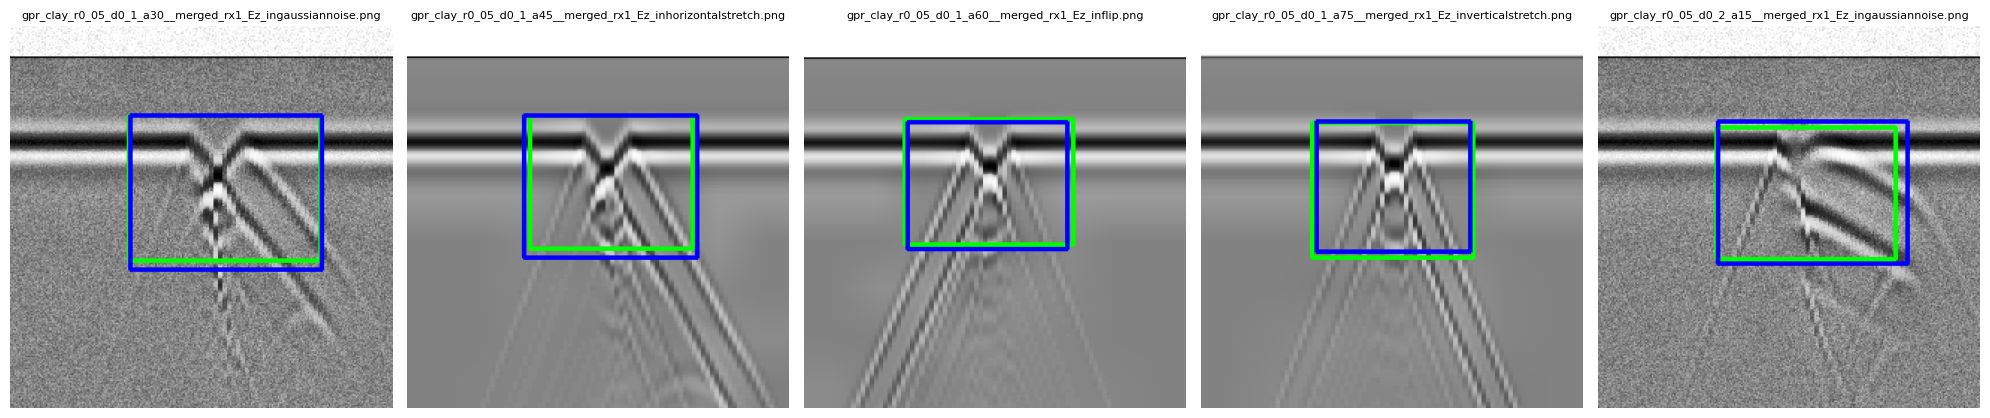

In [19]:
import os
import cv2
import matplotlib.pyplot as plt

# 🗂️ Paths
image_dir = '/content/GPR_stimulated-YOLO-Dataset/yolo dataset/images/test'
gt_label_dir = '/content/GPR_stimulated-YOLO-Dataset/yolo dataset/labels/test'
pred_label_dir = 'runs/detect/yolov5_infer/labels'

# 🎯 Function to draw bounding boxes
def draw_boxes(img_path, gt_path, pred_path):
    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # ✅ Draw ground truth boxes (green)
    if os.path.exists(gt_path):
        with open(gt_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    cls, xc, yc, bw, bh = map(float, parts)
                    x1 = int((xc - bw / 2) * w)
                    y1 = int((yc - bh / 2) * h)
                    x2 = int((xc + bw / 2) * w)
                    y2 = int((yc + bh / 2) * h)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # 🔴 Draw predicted boxes (red)
    if os.path.exists(pred_path):
        with open(pred_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    cls, xc, yc, bw, bh = map(float, parts[:5])
                    x1 = int((xc - bw / 2) * w)
                    y1 = int((yc - bh / 2) * h)
                    x2 = int((xc + bw / 2) * w)
                    y2 = int((yc + bh / 2) * h)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 📸 Visualize a few images
images = sorted([f for f in os.listdir(image_dir) if f.endswith(".png")])[:5]

plt.figure(figsize=(20, 10))
for i, img_file in enumerate(images):
    img_path = os.path.join(image_dir, img_file)
    gt_path = os.path.join(gt_label_dir, img_file.replace('.png', '.txt'))
    pred_path = os.path.join(pred_label_dir, img_file.replace('.png', '.txt'))

    img_with_boxes = draw_boxes(img_path, gt_path, pred_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img_with_boxes)
    plt.title(img_file, fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()


Image  GT_Count  Pred_Count
0             gpr_clay_r0_05_d0_5_a45__merged_rx1_Ez         1           1
1  gpr_loamy_soil_r0_05_d0_4_a45__merged_rx1_Ez_i...         1           1
2  gpr_wet_concrete_r0_05_d0_1_a30__merged_rx1_Ez...         1           1
3  gpr_pec_r0_05_d0_2_a30__merged_rx1_Ez - Copy_i...         1           1
4  gpr_wet_concrete_r0_05_d0_2_a45__merged_rx1_Ez...         1           1

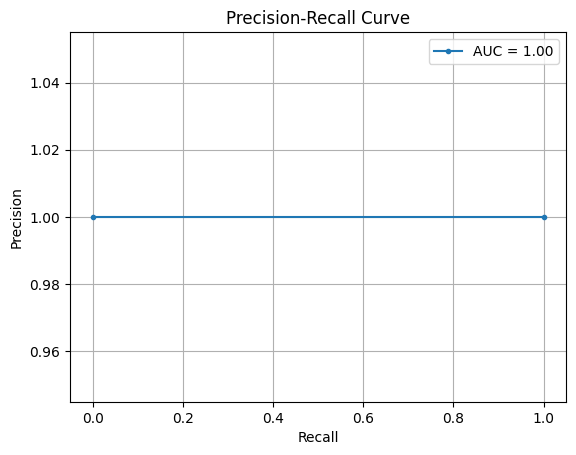

In [22]:
# 📌 2. Per-image detection summary
per_image_stats = []
for file in os.listdir(gt_dir):
    pred_path = os.path.join(pred_dir, file)
    gt_path = os.path.join(gt_dir, file)
    gt_count = len(open(gt_path).readlines()) if os.path.exists(gt_path) else 0
    pred_count = len(open(pred_path).readlines()) if os.path.exists(pred_path) else 0
    per_image_stats.append((file.replace('.txt', ''), gt_count, pred_count))

import pandas as pd
summary_df = pd.DataFrame(per_image_stats, columns=['Image', 'GT_Count', 'Pred_Count'])
display(summary_df.head())

# 📌 3. PR Curve (requires ground truth & prediction scores)
from sklearn.metrics import precision_recall_curve, auc
all_scores = []
all_labels = []

for file in os.listdir(gt_dir):
    gt_path = os.path.join(gt_dir, file)
    pred_path = os.path.join(pred_dir, file)

    gt_count = len(open(gt_path).readlines()) if os.path.exists(gt_path) else 0
    if not os.path.exists(pred_path):
        continue

    with open(pred_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 6:
                conf = float(parts[5])
            else:
                conf = 0.5  # assume if missing
            all_scores.append(conf)
            all_labels.append(1 if gt_count > 0 else 0)

precision, recall, _ = precision_recall_curve(all_labels, all_scores)
auc_score = auc(recall, precision)

plt.plot(recall, precision, marker='.', label=f'AUC = {auc_score:.2f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()
plt.show()


In [23]:
# 4. Confusion matrix-style metrics
TP = sum([1 for iou in iou_list if iou >= 0.5])
FP = len(iou_list) - TP
FN = sum([1 for f in os.listdir(gt_dir) if f.endswith('.txt')]) - TP

precision = TP / (TP + FP + 1e-6)
recall = TP / (TP + FN + 1e-6)
f1 = 2 * precision * recall / (precision + recall + 1e-6)

print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")

Precision: 1.000, Recall: 0.445, F1: 0.616


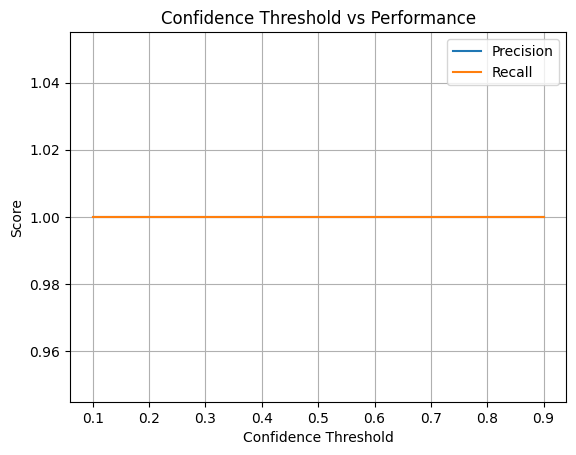

In [24]:
# 5. Confidence threshold tuning
thresholds = np.linspace(0.1, 0.9, 9)
precisions = []
recalls = []

for t in thresholds:
    TP = FP = FN = 0
    for file in os.listdir(gt_dir):
        pred_path = os.path.join(pred_dir, file)
        gt_path = os.path.join(gt_dir, file)
        if not os.path.exists(pred_path):
            continue

        gt_count = len(open(gt_path).readlines()) if os.path.exists(gt_path) else 0
        pred_count = sum([float(l.split()[5]) > t if len(l.split()) >= 6 else True for l in open(pred_path)])
        tp = min(gt_count, pred_count)
        fp = max(0, pred_count - tp)
        fn = max(0, gt_count - tp)

        TP += tp
        FP += fp
        FN += fn

    p = TP / (TP + FP + 1e-6)
    r = TP / (TP + FN + 1e-6)
    precisions.append(p)
    recalls.append(r)

plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.title('Confidence Threshold vs Performance')
plt.xlabel('Confidence Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [29]:
from google.colab import files

# Replace with the correct path to your best weights
model_path = 'runs/train_gpr/yolov5s_gpr/weights/best.pt'

# Download the file
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
from google.colab import files
import os

# Upload multiple images
uploaded = files.upload()

# Save uploaded image names
uploaded_filenames = list(uploaded.keys())
print("Uploaded files:", uploaded_filenames)
#https://github.com/LCSkhalid/GPR_Data/blob/main/dataset.png


Saving gpr image 4.png to gpr image 4.png
Saving gpr image 3.png to gpr image 3.png
Saving gpr image 2.png to gpr image 2.png
Saving gpr image 1.png to gpr image 1.png
Uploaded files: ['gpr image 4.png', 'gpr image 3.png', 'gpr image 2.png', 'gpr image 1.png']


In [31]:
import shutil
import os

# Create a temporary folder for inference if not exists
os.makedirs("inference_input", exist_ok=True)

# Move uploaded files to inference folder
for filename in uploaded_filenames:
    shutil.move(filename, os.path.join("inference_input", filename))

# Run YOLOv5 detection
!python detect.py \
  --weights runs/train_gpr/yolov5s_gpr/weights/best.pt \
  --img 256 \
  --conf 0.3 \
  --source inference_input \
  --name real_gpr_test \
  --save-txt \
  --exist-ok


detect: weights=['runs/train_gpr/yolov5s_gpr/weights/best.pt'], source=inference_input, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=real_gpr_test, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/4 /content/yolov5/inference_input/gpr image 1.png: 256x256 1 hyperbola, 127.8ms
image 2/4 /content/yolov5/inference_input/gpr image 2.png: 256x256 1 hyperbola, 86.9ms
image 3/4 /content/yolov5/inference_input/gpr image 3.png: 256x256 1 hyperbola, 73.9ms
image 4/4 /content/yolov5/inference_input/gpr image 4.png: 25

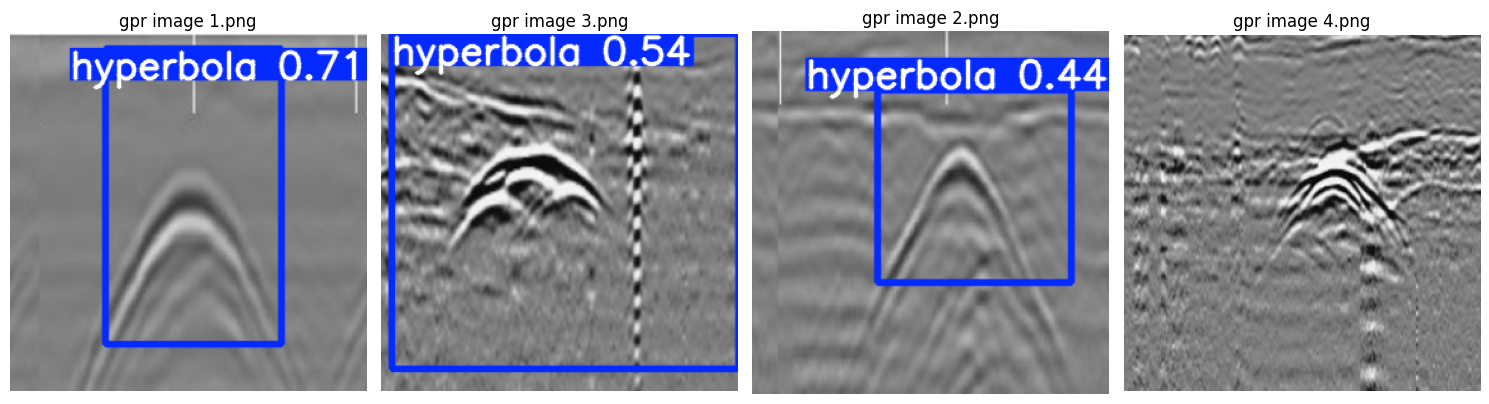

In [33]:
import matplotlib.pyplot as plt
import cv2

result_dir = 'runs/detect/real_gpr_test'
result_imgs = [f for f in os.listdir(result_dir) if f.endswith(('.png', '.jpg'))]

plt.figure(figsize=(15, 8))
for i, fname in enumerate(result_imgs):
    img_path = os.path.join(result_dir, fname)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(result_imgs), i + 1)
    plt.imshow(img)
    plt.title(fname)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [35]:
from google.colab import files
import os

# Upload multiple images
uploaded = files.upload()

# Save uploaded image names
uploaded_filenames = list(uploaded.keys())
print("Uploaded files:", uploaded_filenames)
#https://github.com/irenexychen/gpr-data-classifier/tree/master/hyperbola-classifier/images

Saving hyperbola61.jpg to hyperbola61 (1).jpg
Saving hyperbola30.jpg to hyperbola30 (1).jpg
Saving hyperbola28.jpg to hyperbola28 (1).jpg
Saving hyperbola99.jpg to hyperbola99 (1).jpg
Saving hyperbola80.jpg to hyperbola80 (1).jpg
Saving hyperbola26.jpg to hyperbola26 (1).jpg
Saving hyperbola50.jpg to hyperbola50 (1).jpg
Uploaded files: ['hyperbola61 (1).jpg', 'hyperbola30 (1).jpg', 'hyperbola28 (1).jpg', 'hyperbola99 (1).jpg', 'hyperbola80 (1).jpg', 'hyperbola26 (1).jpg', 'hyperbola50 (1).jpg']


In [36]:
import shutil
import os

# Create a temporary folder for inference if not exists
os.makedirs("inference_input", exist_ok=True)

# Move uploaded files to inference folder
for filename in uploaded_filenames:
    shutil.move(filename, os.path.join("inference_input", filename))

# Run YOLOv5 detection
!python detect.py \
  --weights runs/train_gpr/yolov5s_gpr/weights/best.pt \
  --img 256 \
  --conf 0.3 \
  --source inference_input \
  --name real_gpr_test \
  --save-txt \
  --exist-ok

detect: weights=['runs/train_gpr/yolov5s_gpr/weights/best.pt'], source=inference_input, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=real_gpr_test, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/11 /content/yolov5/inference_input/gpr image 1.png: 256x256 1 hyperbola, 118.5ms
image 2/11 /content/yolov5/inference_input/gpr image 2.png: 256x256 1 hyperbola, 78.1ms
image 3/11 /content/yolov5/inference_input/gpr image 3.png: 256x256 1 hyperbola, 86.7ms
image 4/11 /content/yolov5/inference_input/gpr image 4.png

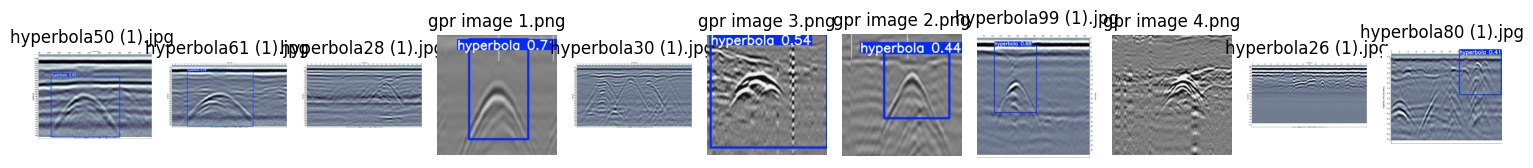

In [37]:
import matplotlib.pyplot as plt
import cv2

result_dir = 'runs/detect/real_gpr_test'
result_imgs = [f for f in os.listdir(result_dir) if f.endswith(('.png', '.jpg'))]

plt.figure(figsize=(15, 8))
for i, fname in enumerate(result_imgs):
    img_path = os.path.join(result_dir, fname)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(result_imgs), i + 1)
    plt.imshow(img)
    plt.title(fname)
    plt.axis('off')
plt.tight_layout()
plt.show()


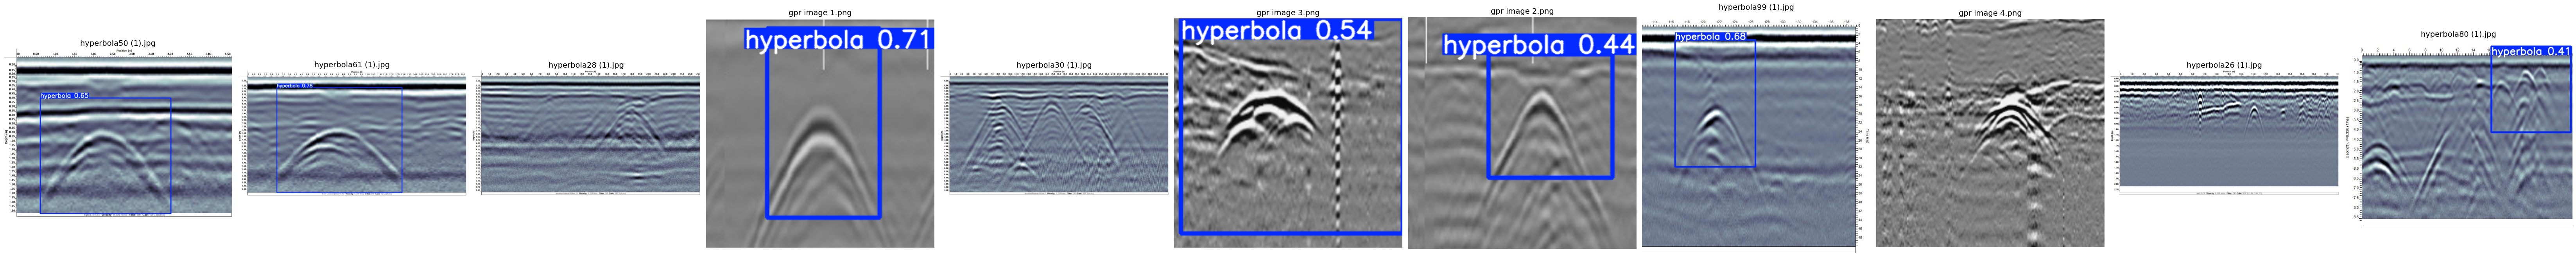

In [38]:
import matplotlib.pyplot as plt
import cv2
import os

result_dir = 'runs/detect/real_gpr_test'
result_imgs = [f for f in os.listdir(result_dir) if f.lower().endswith(('.png', '.jpg'))]

# Increase figure size based on number of images
plt.figure(figsize=(6 * len(result_imgs), 10))  # Wider and taller

for i, fname in enumerate(result_imgs):
    img_path = os.path.join(result_dir, fname)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(result_imgs), i + 1)
    plt.imshow(img)
    plt.title(fname, fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()
